### Recommendation System for E-commerce

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("/home/rewood/Desktop/Untitled Folder/flipkart-products/flipkart_com-ecommerce_sample.csv")

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


## Detect missing values

In [6]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [7]:
df.isnull().mean() * 100

uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating              0.000
brand                      29.320
product_specifications      0.070
dtype: float64

We have about 30% missing values because of col brand, fill it with "Noname" brand. Drop other rows with missing values

In [8]:
df['brand'].fillna('NoName', inplace=True)
df.dropna(inplace=True)

In [9]:
df.isnull().mean() * 100

uniq_id                    0.0
crawl_timestamp            0.0
product_url                0.0
product_name               0.0
product_category_tree      0.0
pid                        0.0
retail_price               0.0
discounted_price           0.0
image                      0.0
is_FK_Advantage_product    0.0
description                0.0
product_rating             0.0
overall_rating             0.0
brand                      0.0
product_specifications     0.0
dtype: float64

In [10]:
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce') # Preprocess overall_rating (convert to numeric)
df['description'] = df['description'].fillna('') # Fill missing descriptions with empty strings

## Handle Duplicates

In [11]:
df.duplicated().sum()

0

We dont have duplicated, but for test remove it.

In [12]:
df.drop_duplicates(inplace=True)

## Handle Inconsistent Data

In [13]:
for i in list(df.columns):
    if df.dtypes[i] == pd.StringDtype:
        df[i] = df[i].str.lower() # Convert column to consistent lowercase
        df[i] = df[i].str.strip() # Remove leading/trailing spaces

In [14]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2ff9kedefgf,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key features of alisha solid women's cycling s...,no rating available,NaN,alisha,"{""product_specification""=>[{""key""=>""number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,fabhomedecor fabric double sofa bed,"[""furniture >> living room furniture >> sofa b...",sbeeh3qgu7mfyjfy,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed (finish co...,no rating available,NaN,fabhomedecor,"{""product_specification""=>[{""key""=>""installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,aw bellies,"[""footwear >> women's footwear >> ballerinas >...",shoeh4grsubjgzxe,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key features of aw bellies sandals wedges heel...,no rating available,NaN,aw,"{""product_specification""=>[{""key""=>""ideal for""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2f6huzmq6sj,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key features of alisha solid women's cycling s...,no rating available,NaN,alisha,"{""product_specification""=>[{""key""=>""number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,sicons all purpose arnica dog shampoo,"[""pet supplies >> grooming >> skin & coat care...",psoeh3zydmsyarj5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications of sicons all purpose arnica do...,no rating available,NaN,sicons,"{""product_specification""=>[{""key""=>""pet type"",..."


## Visualisation

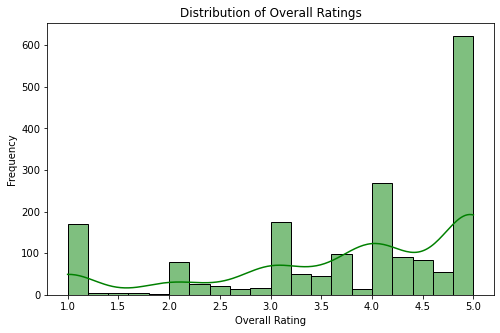

In [15]:
# Convert overall_rating to numeric, if not already
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')

# Plot distribution of Overall Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['overall_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


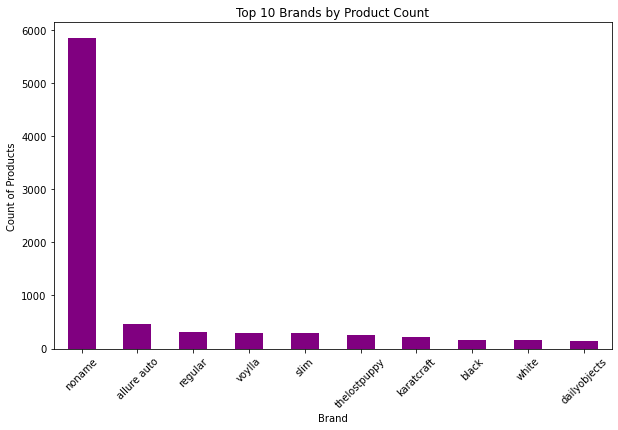

In [16]:
# Plot most common brands
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10).plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

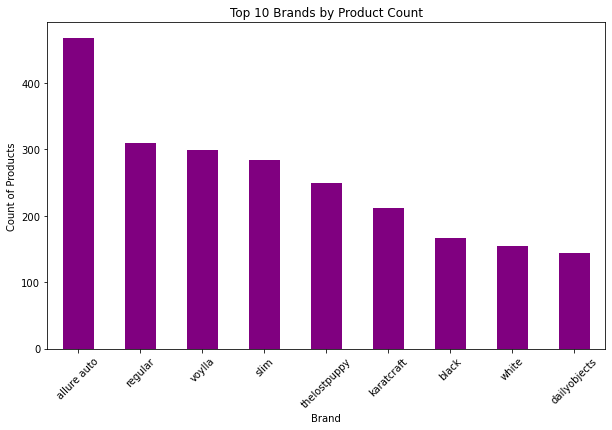

In [17]:
# Plot most common brands without noname
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10)[1:].plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

## User-Based Collaborative Filtering (KNN)
## Product Category Classification
Let's predict the product category

In [62]:

label_encoder = LabelEncoder()

product_name_t              = label_encoder.fit_transform(df['product_name'])
retail_price_t              = label_encoder.fit_transform(df['retail_price'])
description_t               = label_encoder.fit_transform(df['description'])
product_category_tree_t     = label_encoder.fit_transform(df['product_category_tree'])

product_category_tree_t     = label_encoder.fit_transform(df['product_category_tree'])

In [63]:
features =  pd.DataFrame({'product_name_t': product_name_t, 'retail_price_t': retail_price_t, 'description_t': description_t})
target = product_category_tree_t

imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(features_imputed, target_encoded, test_size=0.3, random_state=42)

## Scale the features for better KNN performance

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the model

In [65]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

## Make predictions on the test set

In [66]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 44.12%


## Accuracy vs. Number of Neighbors (k) plot

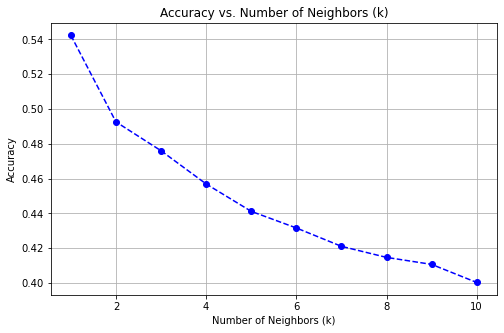

In [67]:
max_k=10

k_values = list(range(1, max_k+1))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

In [68]:
X_test_10 = X_test[:10]
y_test_10 = y_test[:10]

y_pred = knn.predict(X_test_10)
labels = label_encoder.classes_

cm = confusion_matrix(y_test_10, y_pred)
print(cm)


[[0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]]


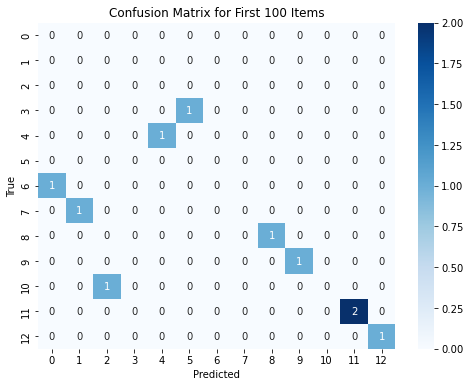

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for First 100 Items')
plt.show()

In [89]:
user_item_matrix = df.pivot_table(index='uniq_id', columns='pid', values='overall_rating').fillna(0)

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

## Find n_neighbors similar users to the given user

In [90]:
def find_similar_users(user_id, user_item_matrix, knn_model, n_neighbors=5):
    if user_id not in user_item_matrix.index:
        print(f"User {user_id} not found in dataset.")
        return []

    user_vector         = user_item_matrix.loc[user_id].values.reshape(1, -1)
    distances, indices  = knn_model.kneighbors(user_vector, n_neighbors=n_neighbors + 1)
    similar_users       = user_item_matrix.index[indices.flatten()[1:]]

    return similar_users

In [91]:
user_id         = user_item_matrix.index[0]
similar_users   = find_similar_users(user_id, user_item_matrix, knn)

print(f"Top similar users to User {user_id}:\n{similar_users}")

Top similar users to User 00234f1417b5b1dc65feb088cf612762:
Index(['ae19a81b730b48b87ca72521af8fb902', 'ae03731c3482a5e42d040dbf723c49af',
       'ae066a3529395e6eebad9b914c9d887d', 'ae6fa9585c124ed80d84897f5eb9370c',
       'ae3fad1fc6656b1dee010f9a0cc1817d'],
      dtype='object', name='uniq_id')


/home/rewood/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Recommend products for the given user

In [96]:
def recommend_products(user_id, user_item_matrix, similar_users):
    
    user_ratings        = user_item_matrix.loc[user_id]
    recommendations     = pd.Series(dtype='float64')

    for similar_user in similar_users:
        similar_user_ratings = user_item_matrix.loc[similar_user]
        recommendations = recommendations.add(similar_user_ratings, fill_value=0)

    recommendations[user_ratings > 0]   = 0
    recommendations                     = recommendations.sort_values(ascending=False)

    return recommendations

In [97]:
recommendations = recommend_products(user_id, user_item_matrix, similar_users)

print(f"Recommended products for User {user_id}:\n{recommendations.head()}")


Recommended products for User 00234f1417b5b1dc65feb088cf612762:
pid
nkce4va4m2zkzguy    5.0
spbdhhhhxpzjdgyb    4.0
rtrdpa9fncrgs8uz    3.0
wate7f5jk2jffhd5    3.0
shodxswwqenjwhdk    1.8
dtype: float64


In [110]:
recommendations_str = recommendations.index.to_series().apply(
    lambda pid: f"Product: {df[df['pid'] == pid]['product_name'].iloc[0]}, Recommended Score: {recommendations[pid]:.2f}"
)

print(f"Recommended products for User {user_id}:\n{recommendations_str[0]}")

Recommended products for User 00234f1417b5b1dc65feb088cf612762:
Product: jdx alloy necklace, Recommended Score: 5.00
